---
# Data Science and Artificial Intelliegence Practicum
## 6-modul. Deep Learning
---

## 6.1 - Image Classification

**GPU vs CPU**
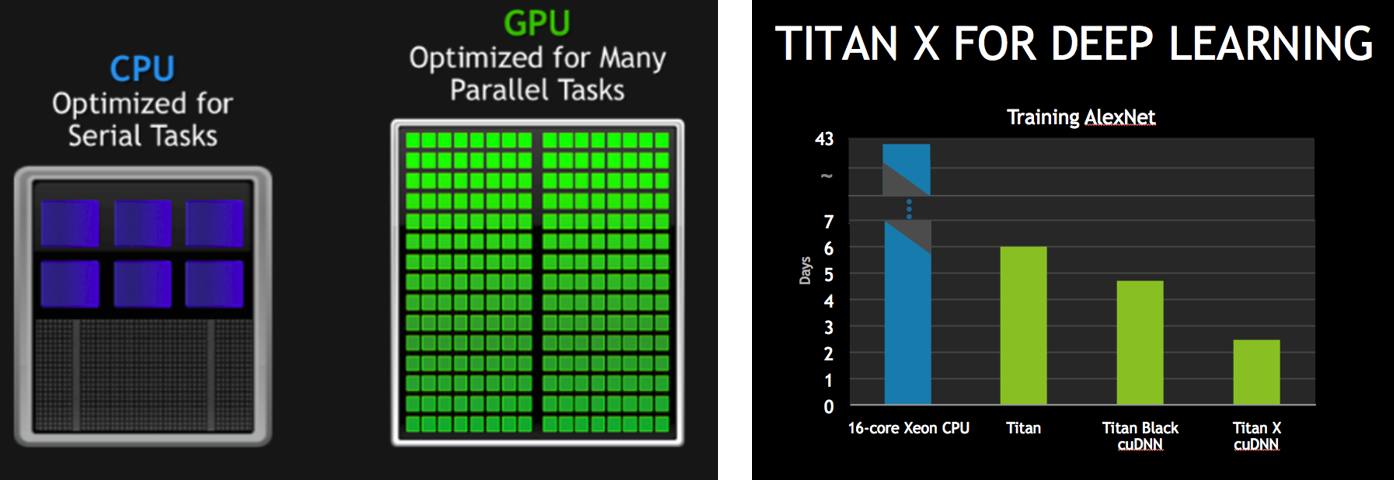

In [ ]:
# !pip3 install torch torchvision torchaudio fastai

In [1]:
import torch
import fastai

# check versions
print(f"{torch.__version__=}")
print(f"{fastai.__version__=}")

# check if the GPU is working
torch.cuda.is_available()

torch.__version__='2.0.0+cu118'
fastai.__version__='2.7.12'


True

### <u>**Let's Build Our First Deep Learning Model!**</u>

#### **Objective:** Building a model that can recognize cats using Artificial Neural Networks.

**About:** We use a model known as `ResNet-34`(short for "Residual Network"), trained using about `1.3 million` images with `1000 classes`. The "34" in ResNet-34 refers to the number of layers in the network. It consists of 34 layers.

**Dataset:** [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) that consists of `7349` pictures of cats and dogs.

In [2]:
# Libraries
from fastai.vision.all import *
from ipywidgets import widgets

# Data
path = untar_data(URLs.PETS)/'images'

# Labeling Function
def is_cat(x): return x[0].isupper()

# Data Loaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# Training
# learn = cnn_learner(dls, resnet34, metrics=accuracy)  # deprecated
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 39.7MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.166694,0.013587,0.994587,01:05


epoch,train_loss,valid_loss,accuracy,time
0,0.061003,0.028752,0.992558,01:01
1,0.024492,0.010199,0.996617,01:00


#### Testing the Model

In [3]:
# widget for uploading images
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is it a cat?: True
Accuracy of a probability: 1.000


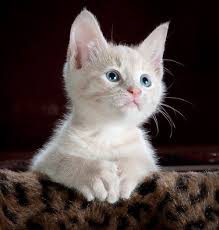

In [4]:
img = PILImage.create(upload.data[-1])  # image
pred, _, prob = learn.predict(img)  # prediction
print(f'Is it a cat?: {pred}')
print(f'Accuracy of a probability: {prob[1].item():.3f}')
img

### **Traditional (classical) Program**

**The main difference between traditional programming and machine learning** is that in traditional programming, the programmer specifies the rules and logic that the program should follow to achieve its objective, while in machine learning, the model learns to make predictions based on patterns in the data it is trained on. This means that machine learning can be used for tasks that are difficult or impossible to solve using traditional programming approaches, such as image recognition.

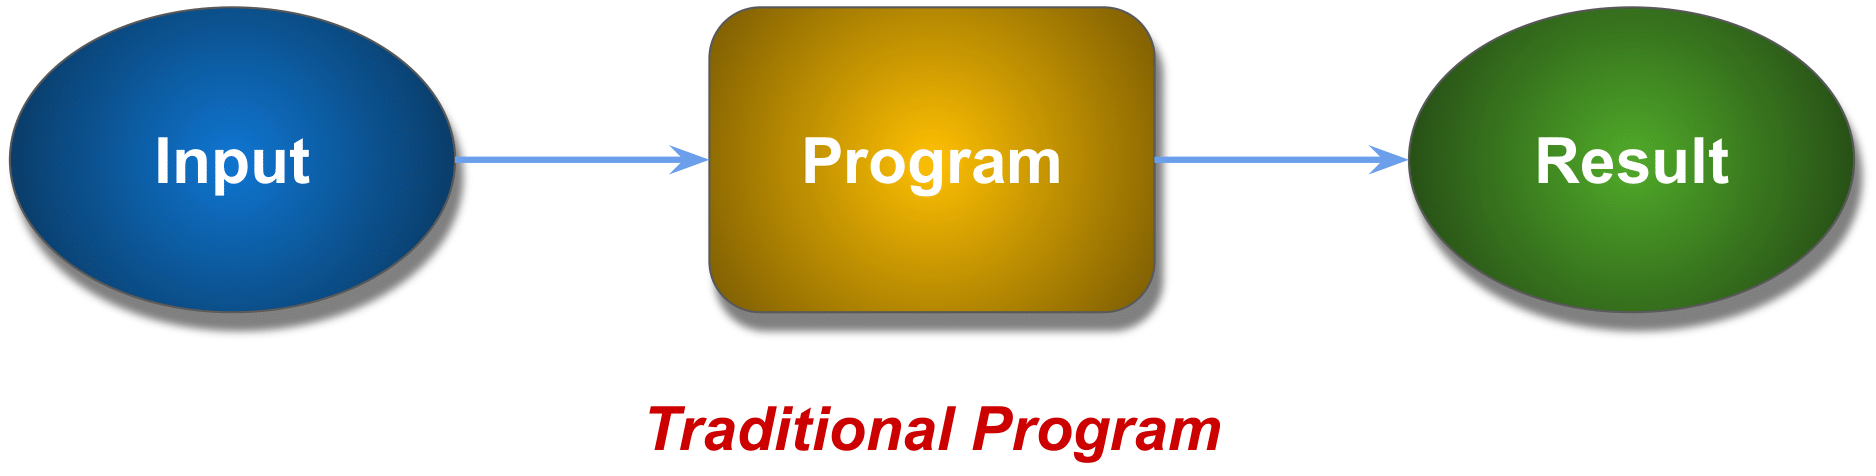

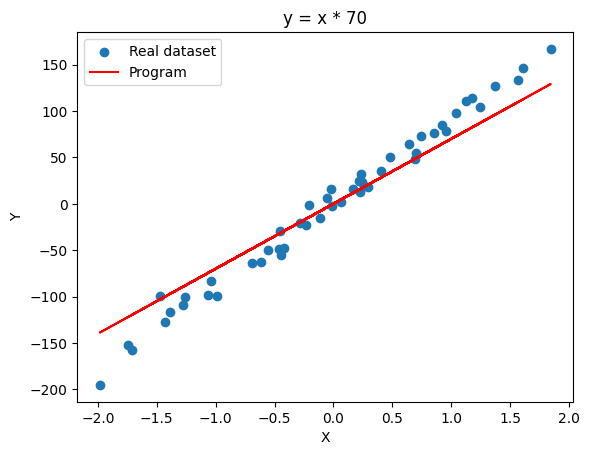

In [5]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate Data
data = make_regression(n_samples=50, n_features=1, noise=10, random_state=21)
x_data, y_data = data[0], data[1]

def classical_program(x): return x * 70

y_pred = [classical_program(x) for x in x_data]

# Plotting
plt.scatter(x_data, y_data, label='Real dataset')
plt.plot(x_data, y_pred, 'r', label='Program')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('y = x * 70')
plt.show()

***“...Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programed would “learn” from its experience...”***

©️*Arthur Samuel* (1961)  
“Artificial Intelligence: A Frontier of Automation” 

---

Several important points from the piece of article:
- The idea of "*weight assignment*"
- Altering the weight assignment to maximize the performance
- The machines can be automated to learn from their experiences, and we don't have to do these processes explicitly

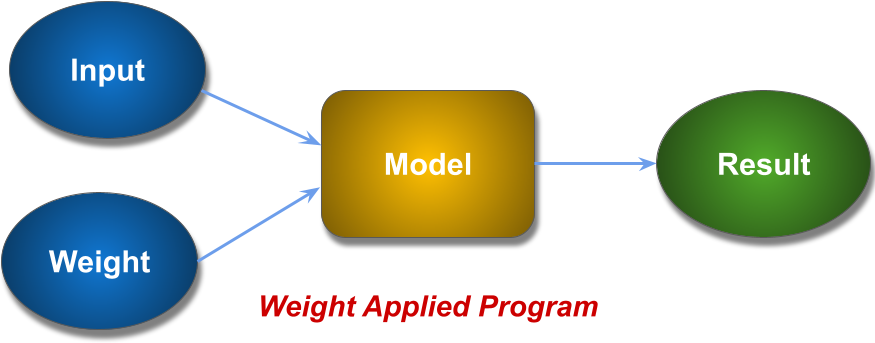

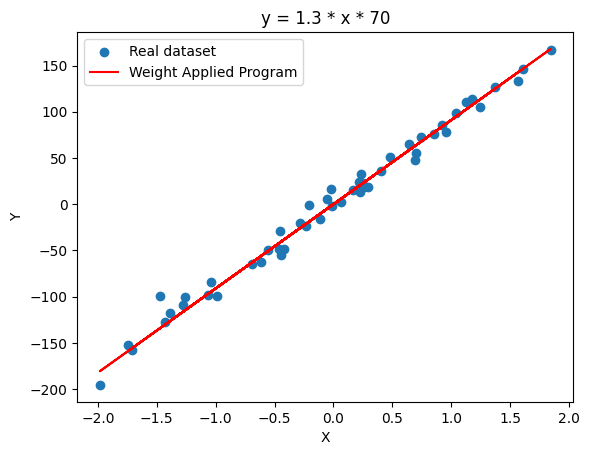

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate Data
data = make_regression(n_samples=50, n_features=1, noise=10, random_state=21)
x_data, y_data = data[0], data[1]

def classical_program(x, w): return w * x * 70

w = 1.3
y_pred = [classical_program(x, w) for x in x_data]

# Plotting
plt.scatter(x_data, y_data, label='Real dataset')
plt.plot(x_data, y_pred, 'r', label='Weight Applied Program')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'y = {w} * x * 70')
plt.show()

The *program* is now called a *model*. The reason is that the model itself is considered a program, and unlike a program, it now has parameters.

### **Machine Learning Model:**

***“...We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programed would “learn” from its experience...”***

©️*Arthur Samuel* (1961)  
“Artificial Intelligence: A Frontier of Automation” 

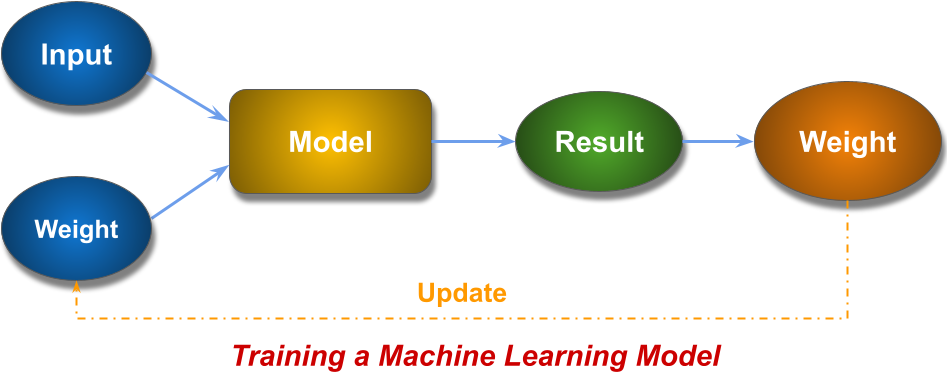

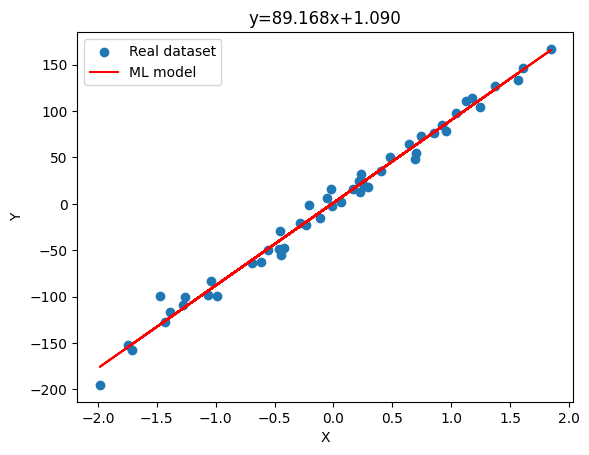

In [7]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate Data
data = make_regression(n_samples=50, n_features=1, noise=10, random_state=21)
x_data, y_data = data[0], data[1]

# Regression
regression = LinearRegression().fit(x_data, y_data)
y_pred = regression.predict(x_data)

# Plotting
plt.scatter(x_data, y_data, label='Real dataset')
plt.plot(x_data, y_pred, 'r', label='ML model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
equation = f"y={regression.coef_[0]:.3f}x+{regression.intercept_:.3f}"
plt.title(equation)
plt.show()

### **Deep Learning Model:**

There are some terms may change in Deep Learning:

- The *model* is now called *architecture* (we often see it called model, so both terms can be used)
- *Weights* are now called *parameters*
- The output from the architecture (model) is called a *prediction*
- The measure of performance is now called *loss*

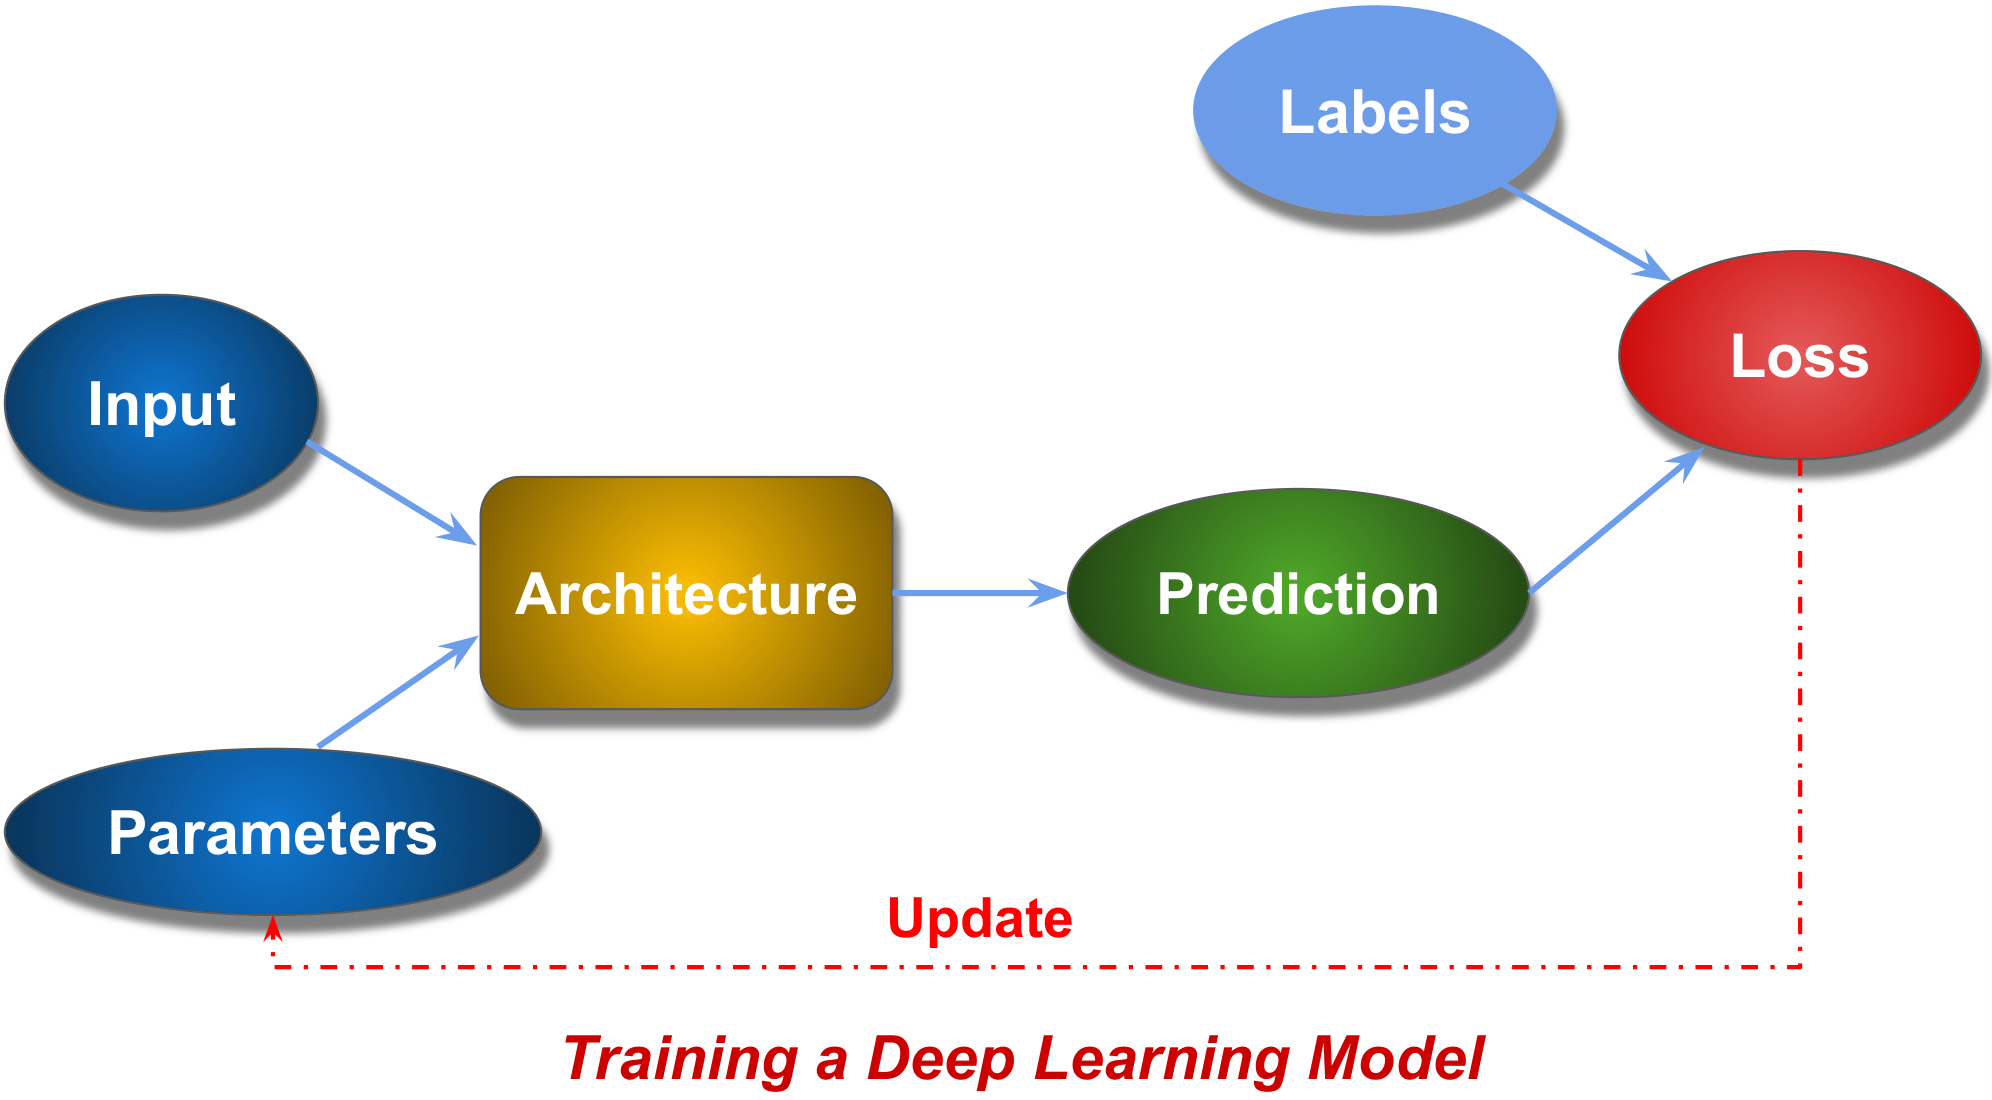

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


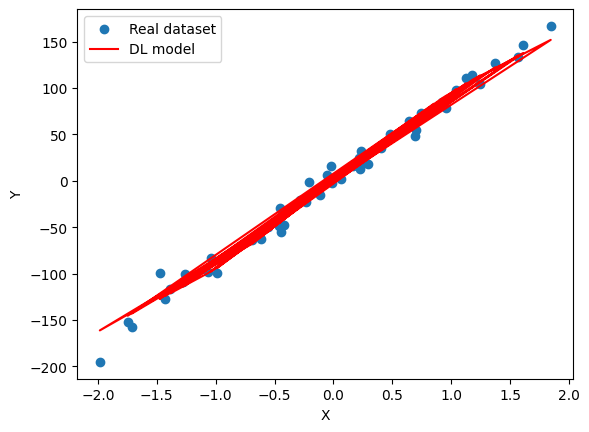

In [8]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Generate Data
data = make_regression(n_samples=50, n_features=1, noise=10, random_state=21)
x_data, y_data = data[0], data[1]

# Regression
regression = MLPRegressor(max_iter=3000).fit(x_data, y_data)
y_pred = regression.predict(x_data)

# Plotting
plt.scatter(x_data, y_data, label='Real dataset')
plt.plot(x_data, y_pred, 'r', label='DL model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()